In [1]:
# getting started

# python3 -m venv ./venv
# pip3 install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# EC Raw Data
### Transform Raw EC data into useable datatable
All EC node types and associated meta data, all EC node type Reserved prices

Combine into clean datasheet

In [3]:
path = "/Users/brandonamos/Documents/repos/redis-projects/competitor/data/EC-Supported-Node-Types.csv"
df_ec_nodes = pd.read_csv(path, sep=",")
df_ec_nodes.tail(2)

Node Version      Cache Node Type  \
50  Memory Optimized Cache Nodes with data tiering...  cache.r6gd.12xlarge   
51  Memory Optimized Cache Nodes with data tiering...  cache.r6gd.16xlarge   

    vCPU  Memory (GiB) Network Performance SSD (GiB)  \
50    48        317.77          20 Gigabit  1,194.42   
51    64        419.09          25 Gigabit  1,592.56   

    Price Per Hour (On-Demand) (US East (Ohio))  Max Memory (Bytes)  \
50                                        9.358        3.410000e+11   
51                                       12.477        4.500000e+11   

    Client-output-buffer-limit-slave-hard-limit (Bytes)  \
50                                        34120634655     
51                                        45000075046     

    Client-output-buffer-limit-slave-soft-limit (Bytes)  1 Byte to GB  \
50                                        34120634655    9.310000e-10   
51                                        45000075046    9.310000e-10   

    Max Memory (GB)  Client-output-buffer-limit-slave-hard-limit (GB)  \
50           317.67                                              31.8   
51           418.96                                              41.9   

    Client-output-buffer-limit-slave-soft-limit (GB)  \
50                                              31.8   
51                                              41.9   

    EC reserved memory percent (25%)  EC2 Node type  \
50                          238.2525  r6gd.12xlarge   
51                          314.2200  r6gd.16xlarge   

    CPU credits earned per hour  Maximum earned credits that can be accrued*  \
50                          NaN                                          NaN   
51                          NaN                                          NaN   

    vCPUs Baseline performance per vCPU  Memory (GiB).1 Network performance  \
50    NaN                           NaN             NaN                 NaN   
51    NaN                           NaN             NaN                 NaN   

    Instance type  On-Demand hourly rate  vCPU.1  Memory (GiB).2  \
50  r6gd.12xlarge                   2.76      48           384.0   
51  r6gd.16xlarge                   3.69      64           512.0   

              Storage Network performance.1 EBS Bandwidth (Mbps)  \
50  2 x 1425 NVMe SSD            20 Gigabit                13500   
51  2 x 1900 NVMe SSD            25 Gigabit                19000   

   Baseline Performance / vCPU  CPU Credits Earned / Hr  \
50                         NaN                      NaN   
51                         NaN                      NaN   

   Network Burst Bandwidth (Gbps)*** EBS Burst Bandwidth (Mbps)  \
50                               NaN                        NaN   
51                               NaN                        NaN   

    Delta (ElastiCache Cost - EC2 Cost)  
50                                6.598  
51                                8.787

In [4]:
# remove Data Tiering Nodes for this study

In [5]:
df_ec_nodes = df_ec_nodes[(df_ec_nodes['Node Version']!='Memory Optimized Cache Nodes with data tiering - Current Generation')]
df_ec_nodes.tail(1)

Node Version    Cache Node Type  \
45  Memory Optimized Cache Nodes - Current Generation  cache.r4.16xlarge   

    vCPU  Memory (GiB) Network Performance SSD (GiB)  \
45    64         407.0          25 Gigabit       NaN   

    Price Per Hour (On-Demand) (US East (Ohio))  Max Memory (Bytes)  \
45                                         7.28        4.370000e+11   

    Client-output-buffer-limit-slave-hard-limit (Bytes)  \
45                                        43702157312     

    Client-output-buffer-limit-slave-soft-limit (Bytes)  1 Byte to GB  \
45                                        43702157312    9.310000e-10   

    Max Memory (GB)  Client-output-buffer-limit-slave-hard-limit (GB)  \
45           406.87                                              40.7   

    Client-output-buffer-limit-slave-soft-limit (GB)  \
45                                              40.7   

    EC reserved memory percent (25%) EC2 Node type  \
45                          305.1525   r4.16xlarge   

    CPU credits earned per hour  Maximum earned credits that can be accrued*  \
45                          NaN                                          NaN   

    vCPUs Baseline performance per vCPU  Memory (GiB).1 Network performance  \
45    NaN                           NaN             NaN                 NaN   

   Instance type  On-Demand hourly rate  vCPU.1  Memory (GiB).2   Storage  \
45   r4.16xlarge                   4.26      64           488.0  EBS Only   

   Network performance.1 EBS Bandwidth (Mbps) Baseline Performance / vCPU  \
45            20 Gigabit                  NaN                         NaN   

    CPU Credits Earned / Hr Network Burst Bandwidth (Gbps)***  \
45                      NaN                               NaN   

   EBS Burst Bandwidth (Mbps)  Delta (ElastiCache Cost - EC2 Cost)  
45                        NaN                                 3.02

In [6]:
# Reserved prices, 1 year and 3 year

In [7]:
path = "/Users/brandonamos/Documents/repos/redis-projects/competitor/data/Reserved-EC-Prices.csv"
df_ec_prices = pd.read_csv(path, sep=",")
df_ec_prices.head(2)

Reservation Years        Node type  RI upfront fee  RI monthly fees*  \
0            1 year  cache.t4g.micro             0.0              8.03   
1            1 year  cache.t4g.small             0.0             16.06   

   RI effective hourly rate**  Savings over On-Demand  On-Demand rate  
0                       0.011                    0.31           0.016  
1                       0.022                    0.31           0.032

In [8]:
df_ec_prices_1year = df_ec_prices[(df_ec_prices['Reservation Years']=='1 year')]
df_ec_prices_1year = df_ec_prices_1year.add_prefix('1 Year ')
df_ec_prices_1year.tail(1)

1 Year Reservation Years   1 Year Node type  1 Year RI upfront fee  \
37                   1 year  cache.r5.24xlarge                    0.0   

    1 Year RI monthly fees*  1 Year RI effective hourly rate**  \
37                  5165.48                              7.076   

    1 Year Savings over On-Demand  1 Year On-Demand rate  
37                           0.32                 10.368

In [9]:
df_ec_prices_3year = df_ec_prices[(df_ec_prices['Reservation Years']=='3 year')]
df_ec_prices_3year = df_ec_prices_3year.add_prefix('3 Year ')
df_ec_prices_3year.tail(1)

3 Year Reservation Years   3 Year Node type  3 Year RI upfront fee  \
75                   3 year  cache.r5.24xlarge                    0.0   

    3 Year RI monthly fees*  3 Year RI effective hourly rate**  \
75                  3923.75                              5.375   

    3 Year Savings over On-Demand  3 Year On-Demand rate  
75                           0.48                 10.368

In [10]:
# Merge data tables, (note, not all EC instances have reserved prices, so there are some nan values)

In [11]:
df_ec_nodes_prices = df_ec_nodes.merge(df_ec_prices_1year, how='left', left_on='Cache Node Type', right_on='1 Year Node type')

In [12]:
df_ec_nodes_prices = df_ec_nodes_prices.merge(df_ec_prices_3year, how='left', left_on='Cache Node Type', right_on='3 Year Node type')

In [13]:
df_ec_nodes_prices

Node Version     Cache Node Type  \
0           Standard Cache Nodes - Current Generation     cache.t4g.micro   
1           Standard Cache Nodes - Current Generation     cache.t4g.small   
2           Standard Cache Nodes - Current Generation    cache.t4g.medium   
3           Standard Cache Nodes - Current Generation      cache.t3.micro   
4           Standard Cache Nodes - Current Generation      cache.t3.small   
5           Standard Cache Nodes - Current Generation     cache.t3.medium   
6           Standard Cache Nodes - Current Generation      cache.t2.micro   
7           Standard Cache Nodes - Current Generation      cache.t2.small   
8           Standard Cache Nodes - Current Generation     cache.t2.medium   
9           Standard Cache Nodes - Current Generation     cache.m6g.large   
10          Standard Cache Nodes - Current Generation    cache.m6g.xlarge   
11          Standard Cache Nodes - Current Generation   cache.m6g.2xlarge   
12          Standard Cache Nodes - Current Generation   cache.m6g.4xlarge   
13          Standard Cache Nodes - Current Generation   cache.m6g.8xlarge   
14          Standard Cache Nodes - Current Generation  cache.m6g.12xlarge   
15          Standard Cache Nodes - Current Generation  cache.m6g.16xlarge   
16          Standard Cache Nodes - Current Generation      cache.m5.large   
17          Standard Cache Nodes - Current Generation     cache.m5.xlarge   
18          Standard Cache Nodes - Current Generation    cache.m5.2xlarge   
19          Standard Cache Nodes - Current Generation    cache.m5.4xlarge   
20          Standard Cache Nodes - Current Generation   cache.m5.12xlarge   
21          Standard Cache Nodes - Current Generation   cache.m5.24xlarge   
22          Standard Cache Nodes - Current Generation      cache.m4.large   
23          Standard Cache Nodes - Current Generation     cache.m4.xlarge   
24          Standard Cache Nodes - Current Generation    cache.m4.2xlarge   
25          Standard Cache Nodes - Current Generation    cache.m4.4xlarge   
26          Standard Cache Nodes - Current Generation   cache.m4.10xlarge   
27  Memory Optimized Cache Nodes - Current Generation     cache.r6g.large   
28  Memory Optimized Cache Nodes - Current Generation    cache.r6g.xlarge   
29  Memory Optimized Cache Nodes - Current Generation   cache.r6g.2xlarge   
30  Memory Optimized Cache Nodes - Current Generation   cache.r6g.4xlarge   
31  Memory Optimized Cache Nodes - Current Generation   cache.r6g.8xlarge   
32  Memory Optimized Cache Nodes - Current Generation  cache.r6g.12xlarge   
33  Memory Optimized Cache Nodes - Current Generation  cache.r6g.16xlarge   
34  Memory Optimized Cache Nodes - Current Generation      cache.r5.large   
35  Memory Optimized Cache Nodes - Current Generation     cache.r5.xlarge   
36  Memory Optimized Cache Nodes - Current Generation    cache.r5.2xlarge   
37  Memory Optimized Cache Nodes - Current Generation    cache.r5.4xlarge   
38  Memory Optimized Cache Nodes - Current Generation   cache.r5.12xlarge   
39  Memory Optimized Cache Nodes - Current Generation   cache.r5.24xlarge   
40  Memory Optimized Cache Nodes - Current Generation      cache.r4.large   
41  Memory Optimized Cache Nodes - Current Generation     cache.r4.xlarge   
42  Memory Optimized Cache Nodes - Current Generation    cache.r4.2xlarge   
43  Memory Optimized Cache Nodes - Current Generation    cache.r4.4xlarge   
44  Memory Optimized Cache Nodes - Current Generation    cache.r4.8xlarge   
45  Memory Optimized Cache Nodes - Current Generation   cache.r4.16xlarge   

    vCPU  Memory (GiB) Network Performance SSD (GiB)  \
0      2         0.500     Up to 5 Gigabit       NaN   
1      2         1.370     Up to 5 Gigabit       NaN   
2      2         3.090     Up to 5 Gigabit       NaN   
3      2         0.500     Up to 5 Gigabit       NaN   
4      2         1.370     Up to 5 Gigabit       NaN   
5      2         3.090     Up to 5 Gigabit       NaN   
6      1         0.555     Lo

In [14]:
# Clean datatable to usable format

In [15]:
df_ec_nodes_prices.rename(columns = {'Cache Node Type':'EC Cache Node Type',
                     'EC reserved memory percent (25%)':'Max Memory per Node (25% EC Reduction)',
                     'vCPU':'EC vCPU',
                     'Memory (GiB)':'EC RAM (GB)',
                    'Network Performance':'EC Network (GiB)',
                    'Price Per Hour (On-Demand) (US East (Ohio))':'EC On-Demand Cost/Hour/Node',
                    '1 Year RI effective hourly rate**':'EC 1 Year RI effective hourly rate/Node',
                    '3 Year RI effective hourly rate**':'EC 3 Year RI effective hourly rate/Node'},
          inplace = True)

In [16]:
df_ec_nodes_prices = df_ec_nodes_prices[['EC Cache Node Type',
                    'Max Memory per Node (25% EC Reduction)',
                    'EC vCPU',
                    'EC RAM (GB)',
                   'EC Network (GiB)',
                    'EC On-Demand Cost/Hour/Node',
                   'EC 1 Year RI effective hourly rate/Node',
                   'EC 3 Year RI effective hourly rate/Node']]

In [17]:
df_ec_nodes_prices.head(3)

EC Cache Node Type  Max Memory per Node (25% EC Reduction)  EC vCPU  \
0    cache.t4g.micro                                  0.3750        2   
1    cache.t4g.small                                  1.0275        2   
2   cache.t4g.medium                                  2.3175        2   

   EC RAM (GB) EC Network (GiB)  EC On-Demand Cost/Hour/Node  \
0         0.50  Up to 5 Gigabit                        0.016   
1         1.37  Up to 5 Gigabit                        0.032   
2         3.09  Up to 5 Gigabit                        0.065   

   EC 1 Year RI effective hourly rate/Node  \
0                                    0.011   
1                                    0.022   
2                                    0.044   

   EC 3 Year RI effective hourly rate/Node  
0                                    0.008  
1                                    0.017  
2                                    0.034

# Create EC node deployment datatable

EC has 46 nodes but multiple deployment types:
* 1 master no HA, 
* 1 master with HA (1-5 extra nodes)
* Cluster mode:
** multiple masters (up to 500 total nodes (including replicas) 

so each individual node can be deployed from a single master with no HA to a 500 node cluster with no HA, to a 250 master node, 250 replica node set up, etc.

#### add additional columns
* HA (Yes/No)
* Cluster Mode (Yes/No)
* Master Nodes Count
* HA Nodes Count
* Total Nodes (Master + HA)
     * calc: (master nodes count * (HA nodes count + 1))
* Total Dataset Size Possible (GB) (Master Nodes)
* Total Memory Limit Possible (GB) (including replication)

In [18]:
path = "/Users/brandonamos/Documents/repos/redis-projects/competitor/data/EC-Deployment-Options.csv"
df_ec_deployment = pd.read_csv(path, sep=",")
df_ec_deployment.head()

HA (Yes/No) Clustered Mode (Yes, No)  Master Nodes Count  HA Nodes Count  \
0          No                       No                   1               0   
1         Yes                       No                   1               1   
2         Yes                       No                   1               2   
3         Yes                       No                   1               3   
4         Yes                       No                   1               4   

   Total Nodes (Master + Replica)  
0                               1  
1                               2  
2                               3  
3                               4  
4                               5

In [19]:
ec_node_type_list = df_ec_nodes_prices['EC Cache Node Type'].tolist()
ec_node_type_list[0:3]

['cache.t4g.micro', 'cache.t4g.small', 'cache.t4g.medium']

In [20]:
# create new df, duplicate each ec deployment node options to each individual node type.
# there are 1223 node deployment options per node type, there are 43 node types. 
# so a total of 56303 deployment options in EC

df_ec_node_deployment_options = pd.DataFrame()
for i in ec_node_type_list:
    # each node type
    print(i)
    # add each node type to the deployment options
    df_ec_deployment_1 = df_ec_deployment.copy()
    df_ec_deployment_1['EC Cache Node Type'] = i
    df_ec_deployment_1.reset_index(inplace=True)
    df_ec_deployment_1 = df_ec_deployment_1.rename(columns = {'index':'id'})
    # append each to a new df
    df_ec_node_deployment_options = df_ec_node_deployment_options.append(df_ec_deployment_1)
    print(df_ec_node_deployment_options.shape)

cache.t4g.micro
(1224, 7)
cache.t4g.small
(2448, 7)
cache.t4g.medium
(3672, 7)
cache.t3.micro
(4896, 7)
cache.t3.small
(6120, 7)
cache.t3.medium
(7344, 7)
cache.t2.micro
(8568, 7)
cache.t2.small
(9792, 7)
cache.t2.medium
(11016, 7)
cache.m6g.large
(12240, 7)
cache.m6g.xlarge
(13464, 7)
cache.m6g.2xlarge
(14688, 7)
cache.m6g.4xlarge
(15912, 7)
cache.m6g.8xlarge
(17136, 7)
cache.m6g.12xlarge
(18360, 7)
cache.m6g.16xlarge
(19584, 7)
cache.m5.large
(20808, 7)
cache.m5.xlarge
(22032, 7)
cache.m5.2xlarge
(23256, 7)
cache.m5.4xlarge
(24480, 7)
cache.m5.12xlarge
(25704, 7)
cache.m5.24xlarge
(26928, 7)
cache.m4.large
(28152, 7)
cache.m4.xlarge
(29376, 7)
cache.m4.2xlarge
(30600, 7)
cache.m4.4xlarge
(31824, 7)
cache.m4.10xlarge
(33048, 7)
cache.r6g.large
(34272, 7)
cache.r6g.xlarge
(35496, 7)
cache.r6g.2xlarge
(36720, 7)
cache.r6g.4xlarge
(37944, 7)
cache.r6g.8xlarge
(39168, 7)
cache.r6g.12xlarge
(40392, 7)
cache.r6g.16xlarge
(41616, 7)
cache.r5.large
(42840, 7)
cache.r5.xlarge
(44064, 7)
cache.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/327110026.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ec_node_deployment_options = df_ec_node_deployment_options.append(df_ec_deployment_1)
/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/327110026.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ec_node_deployment_options = df_ec_node_deployment_options.append(df_ec_deployment_1)
/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/327110026.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ec_node_deployment_options = df_ec_node_deployment_options.append(df_ec_deployment_1)
/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/327110026.py:15: 

In [21]:
df_ec_node_deployment_options['EC Cache Node Type (id)'] = df_ec_node_deployment_options['EC Cache Node Type'] + " " + df_ec_node_deployment_options['id'].astype(str)
df_ec_node_deployment_options.tail()


id HA (Yes/No) Clustered Mode (Yes, No)  Master Nodes Count  \
1219  1219         Yes                      Yes                  79   
1220  1220         Yes                      Yes                  80   
1221  1221         Yes                      Yes                  81   
1222  1222         Yes                      Yes                  82   
1223  1223         Yes                      Yes                  83   

      HA Nodes Count  Total Nodes (Master + Replica) EC Cache Node Type  \
1219               5                             474  cache.r4.16xlarge   
1220               5                             480  cache.r4.16xlarge   
1221               5                             486  cache.r4.16xlarge   
1222               5                             492  cache.r4.16xlarge   
1223               5                             498  cache.r4.16xlarge   

     EC Cache Node Type (id)  
1219  cache.r4.16xlarge 1219  
1220  cache.r4.16xlarge 1220  
1221  cache.r4.16xlarge 1221  
1222  cache.r4.16xlarge 1222  
1223  cache.r4.16xlarge 1223

### Combine the EC node deployment options to the EC node metadata

In [22]:
# f
df_ec_node_dply = df_ec_nodes_prices.merge(df_ec_node_deployment_options, how='left', left_on='EC Cache Node Type', right_on='EC Cache Node Type')

In [23]:
df_ec_node_dply.tail()

EC Cache Node Type  Max Memory per Node (25% EC Reduction)  EC vCPU  \
56299  cache.r4.16xlarge                                305.1525       64   
56300  cache.r4.16xlarge                                305.1525       64   
56301  cache.r4.16xlarge                                305.1525       64   
56302  cache.r4.16xlarge                                305.1525       64   
56303  cache.r4.16xlarge                                305.1525       64   

       EC RAM (GB) EC Network (GiB)  EC On-Demand Cost/Hour/Node  \
56299        407.0       25 Gigabit                         7.28   
56300        407.0       25 Gigabit                         7.28   
56301        407.0       25 Gigabit                         7.28   
56302        407.0       25 Gigabit                         7.28   
56303        407.0       25 Gigabit                         7.28   

       EC 1 Year RI effective hourly rate/Node  \
56299                                      NaN   
56300                                      NaN   
56301                                      NaN   
56302                                      NaN   
56303                                      NaN   

       EC 3 Year RI effective hourly rate/Node    id HA (Yes/No)  \
56299                                      NaN  1219         Yes   
56300                                      NaN  1220         Yes   
56301                                      NaN  1221         Yes   
56302                                      NaN  1222         Yes   
56303                                      NaN  1223         Yes   

      Clustered Mode (Yes, No)  Master Nodes Count  HA Nodes Count  \
56299                      Yes                  79               5   
56300                      Yes                  80               5   
56301                      Yes                  81               5   
56302                      Yes                  82               5   
56303                      Yes                  83               5   

       Total Nodes (Master + Replica) EC Cache Node Type (id)  
56299                             474  cache.r4.16xlarge 1219  
56300                             480  cache.r4.16xlarge 1220  
56301                             486  cache.r4.16xlarge 1221  
56302                             492  cache.r4.16xlarge 1222  
56303                             498  cache.r4.16xlarge 1223

In [24]:
df_ec_node_dply.dtypes

EC Cache Node Type                          object
Max Memory per Node (25% EC Reduction)     float64
EC vCPU                                      int64
EC RAM (GB)                                float64
EC Network (GiB)                            object
EC On-Demand Cost/Hour/Node                float64
EC 1 Year RI effective hourly rate/Node    float64
EC 3 Year RI effective hourly rate/Node    float64
id                                           int64
HA (Yes/No)                                 object
Clustered Mode (Yes, No)                    object
Master Nodes Count                           int64
HA Nodes Count                               int64
Total Nodes (Master + Replica)               int64
EC Cache Node Type (id)                     object
dtype: object

In [25]:
# Perform calculations on merged data

In [26]:
df_ec_node_dply["Total Dataset Size Possible (GB) (Master Nodes)"] = df_ec_node_dply["Master Nodes Count"] * df_ec_node_dply["Max Memory per Node (25% EC Reduction)"]

df_ec_node_dply["Total Memory Limit Possible (GB) (Including Replication)"] = df_ec_node_dply["Total Nodes (Master + Replica)"] * df_ec_node_dply["Max Memory per Node (25% EC Reduction)"]

df_ec_node_dply["Total On Demand Cost/Hour (All Nodes)"] = df_ec_node_dply["EC On-Demand Cost/Hour/Node"] * df_ec_node_dply["Total Nodes (Master + Replica)"]

df_ec_node_dply["Total On Demand Cost/Month (All Nodes)"] = df_ec_node_dply["Total On Demand Cost/Hour (All Nodes)"] * 730

df_ec_node_dply["Total EC 1 RI Cost/Hour (All Nodes)"] = df_ec_node_dply["EC 1 Year RI effective hourly rate/Node"] * df_ec_node_dply["Total Nodes (Master + Replica)"]

df_ec_node_dply["Total EC 1 RI Cost/Month (All Nodes)"] = df_ec_node_dply["Total EC 1 RI Cost/Hour (All Nodes)"] * 730

df_ec_node_dply["Total EC 3 RI Cost/Hour (All Nodes)"] = df_ec_node_dply["EC 3 Year RI effective hourly rate/Node"] * df_ec_node_dply["Total Nodes (Master + Replica)"]

df_ec_node_dply["Total EC 3 RI Cost/Month (All Nodes)"] = df_ec_node_dply["Total EC 3 RI Cost/Hour (All Nodes)"] * 730


df_ec_node_dply.tail()

EC Cache Node Type  Max Memory per Node (25% EC Reduction)  EC vCPU  \
56299  cache.r4.16xlarge                                305.1525       64   
56300  cache.r4.16xlarge                                305.1525       64   
56301  cache.r4.16xlarge                                305.1525       64   
56302  cache.r4.16xlarge                                305.1525       64   
56303  cache.r4.16xlarge                                305.1525       64   

       EC RAM (GB) EC Network (GiB)  EC On-Demand Cost/Hour/Node  \
56299        407.0       25 Gigabit                         7.28   
56300        407.0       25 Gigabit                         7.28   
56301        407.0       25 Gigabit                         7.28   
56302        407.0       25 Gigabit                         7.28   
56303        407.0       25 Gigabit                         7.28   

       EC 1 Year RI effective hourly rate/Node  \
56299                                      NaN   
56300                                      NaN   
56301                                      NaN   
56302                                      NaN   
56303                                      NaN   

       EC 3 Year RI effective hourly rate/Node    id HA (Yes/No)  \
56299                                      NaN  1219         Yes   
56300                                      NaN  1220         Yes   
56301                                      NaN  1221         Yes   
56302                                      NaN  1222         Yes   
56303                                      NaN  1223         Yes   

      Clustered Mode (Yes, No)  Master Nodes Count  HA Nodes Count  \
56299                      Yes                  79               5   
56300                      Yes                  80               5   
56301                      Yes                  81               5   
56302                      Yes                  82               5   
56303                      Yes                  83               5   

       Total Nodes (Master + Replica) EC Cache Node Type (id)  \
56299                             474  cache.r4.16xlarge 1219   
56300                             480  cache.r4.16xlarge 1220   
56301                             486  cache.r4.16xlarge 1221   
56302                             492  cache.r4.16xlarge 1222   
56303                             498  cache.r4.16xlarge 1223   

       Total Dataset Size Possible (GB) (Master Nodes)  \
56299                                       24107.0475   
56300                                       24412.2000   
56301                                       24717.3525   
56302                                       25022.5050   
56303                                       25327.6575   

       Total Memory Limit Possible (GB) (Including Replication)  \
56299                                         144642.285          
56300                                         146473.200          
56301                                         148304.115          
56302                                         150135.030          
56303                                         151965.945          

       Total On Demand Cost/Hour (All Nodes)  \
56299                                3450.72   
56300                                3494.40   
56301                                3538.08   
56302                                3581.76   
56303                                3625.44   

       Total On Demand Cost/Month (All Nodes)  \
56299                               2519025.6   
56300                               2550912.0   
56301                               2582798.4   
56302                               2614684.8   
56303                               2646571.2   

       Total EC 1 RI Cost/Hour (All Nodes)  \
56299                                  NaN   
56300                                  NaN   
56301                                  NaN   
56302                                  NaN   
56303                                  NaN   


In [27]:
df_ec_node_dply.head()

EC Cache Node Type  Max Memory per Node (25% EC Reduction)  EC vCPU  \
0    cache.t4g.micro                                   0.375        2   
1    cache.t4g.micro                                   0.375        2   
2    cache.t4g.micro                                   0.375        2   
3    cache.t4g.micro                                   0.375        2   
4    cache.t4g.micro                                   0.375        2   

   EC RAM (GB) EC Network (GiB)  EC On-Demand Cost/Hour/Node  \
0          0.5  Up to 5 Gigabit                        0.016   
1          0.5  Up to 5 Gigabit                        0.016   
2          0.5  Up to 5 Gigabit                        0.016   
3          0.5  Up to 5 Gigabit                        0.016   
4          0.5  Up to 5 Gigabit                        0.016   

   EC 1 Year RI effective hourly rate/Node  \
0                                    0.011   
1                                    0.011   
2                                    0.011   
3                                    0.011   
4                                    0.011   

   EC 3 Year RI effective hourly rate/Node  id HA (Yes/No)  \
0                                    0.008   0          No   
1                                    0.008   1         Yes   
2                                    0.008   2         Yes   
3                                    0.008   3         Yes   
4                                    0.008   4         Yes   

  Clustered Mode (Yes, No)  Master Nodes Count  HA Nodes Count  \
0                       No                   1               0   
1                       No                   1               1   
2                       No                   1               2   
3                       No                   1               3   
4                       No                   1               4   

   Total Nodes (Master + Replica) EC Cache Node Type (id)  \
0                               1       cache.t4g.micro 0   
1                               2       cache.t4g.micro 1   
2                               3       cache.t4g.micro 2   
3                               4       cache.t4g.micro 3   
4                               5       cache.t4g.micro 4   

   Total Dataset Size Possible (GB) (Master Nodes)  \
0                                            0.375   
1                                            0.375   
2                                            0.375   
3                                            0.375   
4                                            0.375   

   Total Memory Limit Possible (GB) (Including Replication)  \
0                                              0.375          
1                                              0.750          
2                                              1.125          
3                                              1.500          
4                                              1.875          

   Total On Demand Cost/Hour (All Nodes)  \
0                                  0.016   
1                                  0.032   
2                                  0.048   
3                                  0.064   
4                                  0.080   

   Total On Demand Cost/Month (All Nodes)  \
0                                   11.68   
1                                   23.36   
2                                   35.04   
3                                   46.72   
4                                   58.40   

   Total EC 1 RI Cost/Hour (All Nodes)  Total EC 1 RI Cost/Month (All Nodes)  \
0                                0.011                                  8.03   
1                                0.022                                 16.06   
2                                0.033                                 24.09   
3                                0.044                                 32.12   
4                                0.055                                 40.15   

   Total EC 3 RI Cost/Hour (All Nodes)  Tot

In [28]:
path = "/Users/brandonamos/Documents/repos/redis-projects/competitor/data/df_ec_node_deployment_options.csv"
df_ec_node_dply.to_csv(path, index=False)

In [29]:
# Charting:

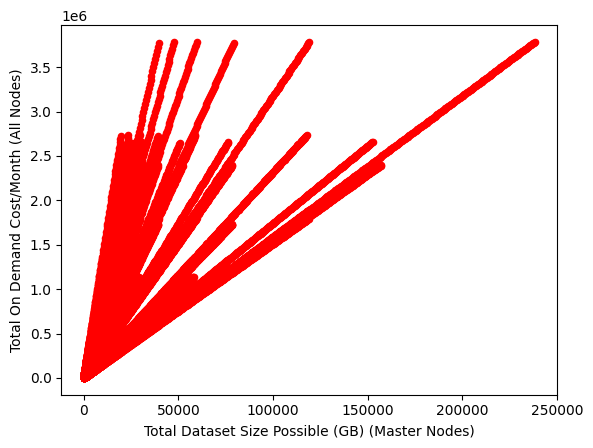

In [30]:
# Prepare data

  
# Draw a scatter plot and here size of dots determined by age of person
df_ec_node_dply.plot.scatter(x = 'Total Dataset Size Possible (GB) (Master Nodes)', y = 'Total On Demand Cost/Month (All Nodes)', c = 'red');

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

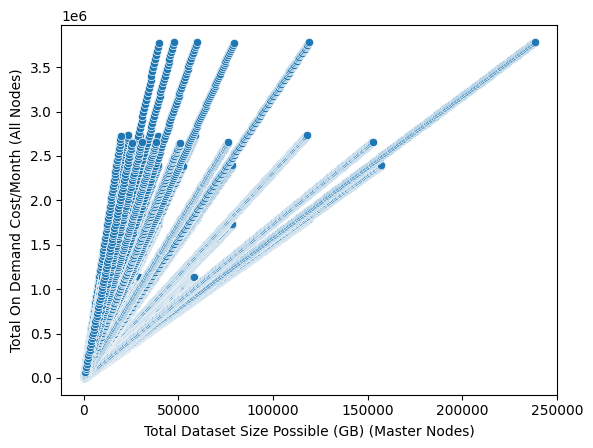

In [32]:
sns.scatterplot(data = df_ec_node_dply, x = 'Total Dataset Size Possible (GB) (Master Nodes)', y = 'Total On Demand Cost/Month (All Nodes)')

plt.show()

In [33]:
# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

In [34]:
# x and y given as DataFrame columns
import plotly.express as px
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()

In [35]:
fig = px.scatter(df_ec_node_dply, x = 'Total Dataset Size Possible (GB) (Master Nodes)', y = 'Total On Demand Cost/Month (All Nodes)')
fig.show()

In [36]:
#df_ec_node_dply1 = df_ec_node_dply[(df_ec_node_dply['EC Cache Node Type']=='cache.m4.xlarge')]
df_ec_node_dply1 = df_ec_node_dply[(df_ec_node_dply['Master Nodes Count']<=10)]
df_ec_node_dply1 = df_ec_node_dply1[(df_ec_node_dply1['Total Dataset Size Possible (GB) (Master Nodes)']<=300)]
df_ec_node_dply1.tail()

EC Cache Node Type  Max Memory per Node (25% EC Reduction)  EC vCPU  \
53857   cache.r4.8xlarge                                   152.4       32   
53858   cache.r4.8xlarge                                   152.4       32   
53859   cache.r4.8xlarge                                   152.4       32   
53860   cache.r4.8xlarge                                   152.4       32   
53861   cache.r4.8xlarge                                   152.4       32   

       EC RAM (GB) EC Network (GiB)  EC On-Demand Cost/Hour/Node  \
53857       203.26       10 Gigabit                         3.64   
53858       203.26       10 Gigabit                         3.64   
53859       203.26       10 Gigabit                         3.64   
53860       203.26       10 Gigabit                         3.64   
53861       203.26       10 Gigabit                         3.64   

       EC 1 Year RI effective hourly rate/Node  \
53857                                      NaN   
53858                                      NaN   
53859                                      NaN   
53860                                      NaN   
53861                                      NaN   

       EC 3 Year RI effective hourly rate/Node  id HA (Yes/No)  \
53857                                      NaN   1         Yes   
53858                                      NaN   2         Yes   
53859                                      NaN   3         Yes   
53860                                      NaN   4         Yes   
53861                                      NaN   5         Yes   

      Clustered Mode (Yes, No)  Master Nodes Count  HA Nodes Count  \
53857                       No                   1               1   
53858                       No                   1               2   
53859                       No                   1               3   
53860                       No                   1               4   
53861                       No                   1               5   

       Total Nodes (Master + Replica) EC Cache Node Type (id)  \
53857                               2      cache.r4.8xlarge 1   
53858                               3      cache.r4.8xlarge 2   
53859                               4      cache.r4.8xlarge 3   
53860                               5      cache.r4.8xlarge 4   
53861                               6      cache.r4.8xlarge 5   

       Total Dataset Size Possible (GB) (Master Nodes)  \
53857                                            152.4   
53858                                            152.4   
53859                                            152.4   
53860                                            152.4   
53861                                            152.4   

       Total Memory Limit Possible (GB) (Including Replication)  \
53857                                              304.8          
53858                                              457.2          
53859                                              609.6          
53860                                              762.0          
53861                                              914.4          

       Total On Demand Cost/Hour (All Nodes)  \
53857                                   7.28   
53858                                  10.92   
53859                                  14.56   
53860                                  18.20   
53861                                  21.84   

       Total On Demand Cost/Month (All Nodes)  \
53857                                  5314.4   
53858                                  7971.6   
53859                                 10628.8   
53860                                 13286.0   
53861                                 15943.2   

       Total EC 1 RI Cost/Hour (All Nodes)  \
53857                                  NaN   
53858                                  NaN   
53859                                  NaN   
53860                                  NaN   
53861                                  NaN   

       Tota

In [37]:
fig = px.scatter(df_ec_node_dply1, 
                 x = 'Total Dataset Size Possible (GB) (Master Nodes)', 
                 y = 'Total On Demand Cost/Month (All Nodes)',
                 symbol="Clustered Mode (Yes, No)",
                 color = 'HA Nodes Count',
                 color_continuous_scale='phase',
                 hover_data=['EC Cache Node Type (id)', 'Master Nodes Count', 'Total Nodes (Master + Replica)'])
fig.show()

# Redis Enterprise Flexible Plan

Create RE Flex Plan Datasheets for growing Db datasets.
Create Datasheets for Large and High Throughput Shard types with and without HA.

In [38]:
data = {
    "Redis Enterprise Plan Type": ['Flexible'],
    "Dataset Size (GB)": [25],
    "Throughput (ops/sec)": [25000],
    "HA (Yes/No)": ['No'],
    "Shard Type": ['Large'],
    "Shard Cost/Hour": [0.585],
    "Min Cluster Cost/Hour": [0.881],
    "Region": ['us-east-1']
}

#load data into a DataFrame object:
df_re_large = pd.DataFrame(data)

In [39]:
df_re_large

Redis Enterprise Plan Type  Dataset Size (GB)  Throughput (ops/sec)  \
0                   Flexible                 25                 25000   

  HA (Yes/No) Shard Type  Shard Cost/Hour  Min Cluster Cost/Hour     Region  
0          No      Large            0.585                  0.881  us-east-1

In [40]:
#df_re_large["Clustered Db (Yes/No)"] = df_re_large["Dataset Size (GB)"] * 730


In [41]:
path = "/Users/brandonamos/Documents/repos/redis-projects/competitor/data/RE Flex Deployment.xlsx"
df_re_large = pd.read_excel(path, sheet_name='Flex Large')
df_re_large.head(2)

Redis Enterprise Plan Type  Dataset Size (GB)  Throughput (ops/sec)  \
0                   Flexible                 25                 25000   
1                   Flexible                 50                 50000   

  HA (Yes/No) Clustered Db (Yes/No)  \
0          No                    No   
1          No                   Yes   

   Total Dataset Size (Including Replication) (GB)  Master Shard Count  \
0                                               25                   1   
1                                               50                   2   

   Total Shard Count Shard Type  Shard Cost/Hour  Min Cluster Cost/Hour  \
0                  1      Large            0.585                  0.881   
1                  2      Large            0.585                  0.881   

   Total Shard Cost/Hour  Total Cluster Cost/Hour  Cost/Month     Region  
0                  0.585                    0.881      643.13  us-east-1  
1                  1.170                    1.170      854.10  us-east-1

In [42]:
path = "/Users/brandonamos/Documents/repos/redis-projects/competitor/data/RE Flex Deployment.xlsx"
df_re_ht = pd.read_excel(path, sheet_name='Flex High Throughput')
df_re_ht.tail(2)

Redis Enterprise Plan Type  Dataset Size (GB)  Throughput (ops/sec)  \
748                   Flexible              622.5               6225000   
749                   Flexible              625.0               6250000   

    HA (Yes/No) Clustered Db (Yes/No)  \
748         Yes                   Yes   
749         Yes                   Yes   

     Total Dataset Size (Including Replication) (GB)  Master Shard Count  \
748                                           1245.0                 249   
749                                           1250.0                 250   

     Total Shard Count       Shard Type  Shard Cost/Hour  \
748                498  High Throughput            0.198   
749                500  High Throughput            0.198   

     Min Cluster Cost/Hour  Total Shard Cost/Hour  Total Cluster Cost/Hour  \
748                  0.881                 98.604                   98.604   
749                  0.881                 99.000                   99.000   

     Cost/Month     Region  
748    71980.92  us-east-1  
749    72270.00  us-east-1

In [43]:
df_re = df_re_large.append(df_re_ht)
print(df_re.shape)
df_re.tail(2)

(1500, 15)


/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/1454464449.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Redis Enterprise Plan Type  Dataset Size (GB)  Throughput (ops/sec)  \
748                   Flexible              622.5               6225000   
749                   Flexible              625.0               6250000   

    HA (Yes/No) Clustered Db (Yes/No)  \
748         Yes                   Yes   
749         Yes                   Yes   

     Total Dataset Size (Including Replication) (GB)  Master Shard Count  \
748                                           1245.0                 249   
749                                           1250.0                 250   

     Total Shard Count       Shard Type  Shard Cost/Hour  \
748                498  High Throughput            0.198   
749                500  High Throughput            0.198   

     Min Cluster Cost/Hour  Total Shard Cost/Hour  Total Cluster Cost/Hour  \
748                  0.881                 98.604                   98.604   
749                  0.881                 99.000                   99.000   

     Cost/Month     Region  
748    71980.92  us-east-1  
749    72270.00  us-east-1

In [44]:
fig = px.scatter(df_re, 
                 x = 'Dataset Size (GB)', 
                 y = 'Cost/Month',
                 color = 'Shard Type',
                 symbol = 'HA (Yes/No)',
                 #size = 'Master Shard Count',
                 hover_data=['Throughput (ops/sec)', 
                             'Master Shard Count', 
                             'Total Shard Count', 
                             'HA (Yes/No)', 
                             'Clustered Db (Yes/No)',
                             'Total Dataset Size (Including Replication) (GB)'])
fig.show()

# Plotting them Together

In [45]:
#df_ec_node_dply1 = df_ec_node_dply[(df_ec_node_dply['EC Cache Node Type']=='cache.m4.xlarge')]
df_ec_node_dply1 = df_ec_node_dply[(df_ec_node_dply['Master Nodes Count']<=500)]
df_ec_node_dply1 = df_ec_node_dply1[(df_ec_node_dply1['Total Dataset Size Possible (GB) (Master Nodes)']<=150)]
df_ec_node_dply1 = df_ec_node_dply1[(df_ec_node_dply1['HA Nodes Count']>=1) & (df_ec_node_dply1['HA Nodes Count']<=2)]
df_ec_node_dply1.tail()

df_re1 = df_re[(df_re['Dataset Size (GB)'])<=150]
df_re1 = df_re1[(df_re1['HA (Yes/No)'])=='Yes']

In [46]:
px.scatter(
    x=df_ec_node_dply1['Total Dataset Size Possible (GB) (Master Nodes)'],
    y=df_ec_node_dply1['Total On Demand Cost/Month (All Nodes)'], 
    symbol=df_ec_node_dply1["Clustered Mode (Yes, No)"],
    color = df_ec_node_dply1['HA Nodes Count'],
    #color_continuous_scale='phase',
    labels={
        "x": "Total Dataset Size Possible (GB) (Master Nodes)",
        "y": "Total On Demand Cost/Month (All Nodes)'",
        "symbol": "HA Nodes Count", 
        "color": "HA Nodes Count"
    },
    hover_data = {
        'EC Cache Node Type':df_ec_node_dply1['EC Cache Node Type (id)'],
        'Master Nodes Count':df_ec_node_dply1['Master Nodes Count'],
        'Total Nodes (Master + Replica)':df_ec_node_dply1['Total Nodes (Master + Replica)']
    }
).add_traces(
    px.scatter(
        x=df_re1['Dataset Size (GB)'],
        y=df_re1['Cost/Month'],
        symbol = df_re1['HA (Yes/No)'],
        color = df_re1['Shard Type'],
        size = df_re1['Min Cluster Cost/Hour'],
        labels={
            "x": "Dataset Size (GB)",
            "y": "Cost/Month",
            "symbol": "HA (Yes/No)", 
            "color": "Shard Type"
    },
        hover_data={
            'Throughput (ops/sec)':df_re1['Throughput (ops/sec)'], 
            'Master Shard Count':df_re1['Master Shard Count'], 
            'Total Shard Count':df_re1['Total Shard Count'], 
            'HA (Yes/No)':df_re1['HA (Yes/No)'], 
            'Clustered Db (Yes/No)':df_re1['Clustered Db (Yes/No)'],
            'Total Dataset Size (Including Replication) (GB)':df_re1['Total Dataset Size (Including Replication) (GB)']
        }
    ).data)


# Putting it All Together (Merging EC and RE)

Merging the tables together to get an acurate picture of RE vs EC means we need to examine each EC node deployment option (56304 unique options) to each individual RE Flex option (1500 unique options).

This can be reduced though, we only need to look at HA vs HA and non-HA vs non-HA.
And it can be further reduced once the initial merge is done per RE Flex option to filter the options to within a percentage of total dataset size in the plus and minus direction.
(ie. keep only (-20% - +20%) RE total dataset size to EC total dataset size ). This is because we want to try and keep it apples to apples in some respect. Not compare a 25GB deployment to a 1TB deployment which doesnt make sense.

If needed a further reduction can be done to keep master shard counts relativly similar
(ie. RE deployment has 10 master nodes, EC should have between 7 and 13 master nodes)

#### How do we do this:

First filter both dfs to be HA vs non HA tables.

Then:

EC-Node-DF on the left side, add a single row from the RE-df table (ie. a single RE flex deployment).
Then peform calculations on datasize comparison between EC vs RE.
The filter to within +/-20% total dataset size.

Then repeate the step and append to the final datatable.

In [47]:
# RE
print(df_re.shape)
df_re.tail(2)

(1500, 15)


Redis Enterprise Plan Type  Dataset Size (GB)  Throughput (ops/sec)  \
748                   Flexible              622.5               6225000   
749                   Flexible              625.0               6250000   

    HA (Yes/No) Clustered Db (Yes/No)  \
748         Yes                   Yes   
749         Yes                   Yes   

     Total Dataset Size (Including Replication) (GB)  Master Shard Count  \
748                                           1245.0                 249   
749                                           1250.0                 250   

     Total Shard Count       Shard Type  Shard Cost/Hour  \
748                498  High Throughput            0.198   
749                500  High Throughput            0.198   

     Min Cluster Cost/Hour  Total Shard Cost/Hour  Total Cluster Cost/Hour  \
748                  0.881                 98.604                   98.604   
749                  0.881                 99.000                   99.000   

     Cost/Month     Region  
748    71980.92  us-east-1  
749    72270.00  us-east-1

In [48]:
print(df_ec_node_dply.shape)
df_ec_node_dply.tail(2)

(56304, 23)


EC Cache Node Type  Max Memory per Node (25% EC Reduction)  EC vCPU  \
56302  cache.r4.16xlarge                                305.1525       64   
56303  cache.r4.16xlarge                                305.1525       64   

       EC RAM (GB) EC Network (GiB)  EC On-Demand Cost/Hour/Node  \
56302        407.0       25 Gigabit                         7.28   
56303        407.0       25 Gigabit                         7.28   

       EC 1 Year RI effective hourly rate/Node  \
56302                                      NaN   
56303                                      NaN   

       EC 3 Year RI effective hourly rate/Node    id HA (Yes/No)  \
56302                                      NaN  1222         Yes   
56303                                      NaN  1223         Yes   

      Clustered Mode (Yes, No)  Master Nodes Count  HA Nodes Count  \
56302                      Yes                  82               5   
56303                      Yes                  83               5   

       Total Nodes (Master + Replica) EC Cache Node Type (id)  \
56302                             492  cache.r4.16xlarge 1222   
56303                             498  cache.r4.16xlarge 1223   

       Total Dataset Size Possible (GB) (Master Nodes)  \
56302                                       25022.5050   
56303                                       25327.6575   

       Total Memory Limit Possible (GB) (Including Replication)  \
56302                                         150135.030          
56303                                         151965.945          

       Total On Demand Cost/Hour (All Nodes)  \
56302                                3581.76   
56303                                3625.44   

       Total On Demand Cost/Month (All Nodes)  \
56302                               2614684.8   
56303                               2646571.2   

       Total EC 1 RI Cost/Hour (All Nodes)  \
56302                                  NaN   
56303                                  NaN   

       Total EC 1 RI Cost/Month (All Nodes)  \
56302                                   NaN   
56303                                   NaN   

       Total EC 3 RI Cost/Hour (All Nodes)  \
56302                                  NaN   
56303                                  NaN   

       Total EC 3 RI Cost/Month (All Nodes)  
56302                                   NaN  
56303                                   NaN

In [49]:
# Filter tables to Non-HA
print(df_re.shape)

df_re_noHA = df_re[(df_re['HA (Yes/No)'])=='No']
df_re_noHA = df_re_noHA[(df_re_noHA['Shard Type'])=='Large']
df_re_noHA = df_re_noHA[(df_re_noHA['Dataset Size (GB)'])<=500]
print(df_re_noHA.shape)
#df_re_noHA.tail(2)

(1500, 15)
(20, 15)


In [50]:
print(df_ec_node_dply.shape)
df_ec_node_dply_noHA = df_ec_node_dply[(df_ec_node_dply['HA Nodes Count']==0)]
df_ec_node_dply_noHA = df_ec_node_dply_noHA[(df_ec_node_dply_noHA['Total Dataset Size Possible (GB) (Master Nodes)']<=750)]
print(df_ec_node_dply_noHA.shape)
#df_ec_node_dply_noHA.tail(2)

(56304, 23)
(5313, 23)


In [51]:
# NO HA Table

In [52]:
df_re_noHA.reset_index()
df_re_noHA = df_re_noHA.add_prefix('RE-')
#df_re_noHA

In [53]:
df_ec_node_dply_noHA1 = df_ec_node_dply_noHA
print(df_ec_node_dply_noHA1.shape)
df_ec_node_dply_noHA1.head(1)

(5313, 23)


EC Cache Node Type  Max Memory per Node (25% EC Reduction)  EC vCPU  \
0    cache.t4g.micro                                   0.375        2   

   EC RAM (GB) EC Network (GiB)  EC On-Demand Cost/Hour/Node  \
0          0.5  Up to 5 Gigabit                        0.016   

   EC 1 Year RI effective hourly rate/Node  \
0                                    0.011   

   EC 3 Year RI effective hourly rate/Node  id HA (Yes/No)  \
0                                    0.008   0          No   

  Clustered Mode (Yes, No)  Master Nodes Count  HA Nodes Count  \
0                       No                   1               0   

   Total Nodes (Master + Replica) EC Cache Node Type (id)  \
0                               1       cache.t4g.micro 0   

   Total Dataset Size Possible (GB) (Master Nodes)  \
0                                            0.375   

   Total Memory Limit Possible (GB) (Including Replication)  \
0                                              0.375          

   Total On Demand Cost/Hour (All Nodes)  \
0                                  0.016   

   Total On Demand Cost/Month (All Nodes)  \
0                                   11.68   

   Total EC 1 RI Cost/Hour (All Nodes)  Total EC 1 RI Cost/Month (All Nodes)  \
0                                0.011                                  8.03   

   Total EC 3 RI Cost/Hour (All Nodes)  Total EC 3 RI Cost/Month (All Nodes)  
0                                0.008                                  5.84

In [54]:
# iterate through rows:
df_all_NoHA = pd.DataFrame()
for index, row in df_re_noHA.iterrows():
    #print(row)
    #print('**********')
    
    count = -1
    #df_all = pd.DataFrame()
    #print(df_ec_node_dply_noHA1.shape)
    df_ec_node_dply_noHA = df_ec_node_dply_noHA1.copy()
    for i in row:
        count +=1
        #print(row.index[count])
        #print(i)
        df_ec_node_dply_noHA[row.index[count]] = i
    #print(df_ec_node_dply_noHA.shape)    
    df_ec_node_dply_noHA["Total Deployment Size Delta (GB) (RE - EC)"] = df_ec_node_dply_noHA["RE-Total Dataset Size (Including Replication) (GB)"] - df_ec_node_dply_noHA['Total Memory Limit Possible (GB) (Including Replication)']

    df_ec_node_dply_noHA["% Deployment size Change (RE vs EC)"] = (df_ec_node_dply_noHA['RE-Total Dataset Size (Including Replication) (GB)'] - df_ec_node_dply_noHA['Total Memory Limit Possible (GB) (Including Replication)'])/abs(df_ec_node_dply_noHA['Total Memory Limit Possible (GB) (Including Replication)'])

    df_ec_node_dply_noHA["Total Master shard Size Delta (GB) (RE - EC)"] = df_ec_node_dply_noHA['RE-Dataset Size (GB)'] - df_ec_node_dply_noHA['Total Dataset Size Possible (GB) (Master Nodes)']

    df_ec_node_dply_noHA["% Total Master Shard Size Change (RE vs EC)"] = (df_ec_node_dply_noHA['RE-Dataset Size (GB)'] - df_ec_node_dply_noHA['Total Dataset Size Possible (GB) (Master Nodes)'])/abs(df_ec_node_dply_noHA['Total Dataset Size Possible (GB) (Master Nodes)'])

    df_ec_node_dply_noHA["ON DEMAND Price Delta (RE - EC)"] = df_ec_node_dply_noHA['RE-Cost/Month'] - df_ec_node_dply_noHA['Total On Demand Cost/Month (All Nodes)']

    df_ec_node_dply_noHA["ON DEMAND % Change (RE vs EC)"] = (df_ec_node_dply_noHA['RE-Cost/Month'] - df_ec_node_dply_noHA['Total On Demand Cost/Month (All Nodes)'])/abs(df_ec_node_dply_noHA['Total On Demand Cost/Month (All Nodes)'])

    df_ec_node_dply_noHA["Total Shard Count Delta (RE - EC)"] = df_ec_node_dply_noHA['RE-Total Shard Count'] - df_ec_node_dply_noHA['Total Nodes (Master + Replica)']

    df_ec_node_dply_noHA["% Total Shard Count Change (RE - EC)"] = (df_ec_node_dply_noHA['RE-Total Shard Count'] - df_ec_node_dply_noHA['Total Nodes (Master + Replica)'])/abs(df_ec_node_dply_noHA['Total Nodes (Master + Replica)'])

    df_ec_node_dply_noHA["Total Master Shard Count Delta (RE - EC)"] = df_ec_node_dply_noHA['RE-Master Shard Count'] - df_ec_node_dply_noHA['Master Nodes Count']

    df_ec_node_dply_noHA["% Total Master Shard Count Change (RE - EC)"] = (df_ec_node_dply_noHA['RE-Master Shard Count'] - df_ec_node_dply_noHA['Master Nodes Count'])/abs(df_ec_node_dply_noHA['Master Nodes Count'])
    #print(df_ec_node_dply_noHA.shape)
    # Filter
    df_ec_node_dply_noHA = df_ec_node_dply_noHA[(df_ec_node_dply_noHA['% Total Master Shard Size Change (RE vs EC)']>=-0.4) & (df_ec_node_dply_noHA['% Total Master Shard Size Change (RE vs EC)']<=0.4)]
    df_ec_node_dply_noHA = df_ec_node_dply_noHA[(df_ec_node_dply_noHA['% Total Master Shard Count Change (RE - EC)']>=-0.8) & (df_ec_node_dply_noHA['% Total Master Shard Count Change (RE - EC)']<=4)]
    
    #print(df_ec_node_dply_noHA.shape)
    print("***")
    df_all_NoHA = df_all_NoHA.append(df_ec_node_dply_noHA)
    print(df_all_NoHA.shape)

***
(40, 48)
***
(113, 48)
***
(211, 48)
***
(352, 48)
***
(512, 48)
***
(704, 48)
***
(924, 48)
***
(1184, 48)
***
(1465, 48)
***
(1783, 48)
***
(2129, 48)
***
(2515, 48)
***
(2929, 48)
***
(3372, 48)


/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/843585192.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/843585192.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/843585192.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/843585192.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/843585192.py:43: FutureWarning:

The frame.append method is depreca

***
(3851, 48)
***
(4357, 48)
***
(4897, 48)
***
(5461, 48)
***
(6017, 48)
***
(6553, 48)


/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/843585192.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/843585192.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/843585192.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/843585192.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/843585192.py:43: FutureWarning:

The frame.append method is depreca

In [55]:
df_ec_node_dply_noHA1.shape

(5313, 23)

In [56]:
df_all_NoHA.shape

(6553, 48)

In [57]:
df_all_NoHA.head(2)

EC Cache Node Type  Max Memory per Node (25% EC Reduction)  EC vCPU  \
11024    cache.m6g.large                                  4.7925        2   
11025    cache.m6g.large                                  4.7925        2   

       EC RAM (GB)  EC Network (GiB)  EC On-Demand Cost/Hour/Node  \
11024         6.38  Up to 10 Gigabit                        0.149   
11025         6.38  Up to 10 Gigabit                        0.149   

       EC 1 Year RI effective hourly rate/Node  \
11024                                    0.102   
11025                                    0.102   

       EC 3 Year RI effective hourly rate/Node  id HA (Yes/No)  \
11024                                    0.077   8          No   
11025                                    0.077   9          No   

      Clustered Mode (Yes, No)  Master Nodes Count  HA Nodes Count  \
11024                      Yes                   4               0   
11025                      Yes                   5               0   

       Total Nodes (Master + Replica) EC Cache Node Type (id)  \
11024                               4       cache.m6g.large 8   
11025                               5       cache.m6g.large 9   

       Total Dataset Size Possible (GB) (Master Nodes)  \
11024                                          19.1700   
11025                                          23.9625   

       Total Memory Limit Possible (GB) (Including Replication)  \
11024                                            19.1700          
11025                                            23.9625          

       Total On Demand Cost/Hour (All Nodes)  \
11024                                  0.596   
11025                                  0.745   

       Total On Demand Cost/Month (All Nodes)  \
11024                                  435.08   
11025                                  543.85   

       Total EC 1 RI Cost/Hour (All Nodes)  \
11024                                0.408   
11025                                0.510   

       Total EC 1 RI Cost/Month (All Nodes)  \
11024                                297.84   
11025                                372.30   

       Total EC 3 RI Cost/Hour (All Nodes)  \
11024                                0.308   
11025                                0.385   

       Total EC 3 RI Cost/Month (All Nodes) RE-Redis Enterprise Plan Type  \
11024                                224.84                      Flexible   
11025                                281.05                      Flexible   

       RE-Dataset Size (GB)  RE-Throughput (ops/sec) RE-HA (Yes/No)  \
11024                  25.0                    25000             No   
11025                  25.0                    25000             No   

      RE-Clustered Db (Yes/No)  \
11024                       No   
11025                       No   

       RE-Total Dataset Size (Including Replication) (GB)  \
11024                                               25.0    
11025                                               25.0    

       RE-Master Shard Count  RE-Total Shard Count RE-Shard Type  \
11024                      1                     1         Large   
11025                      1                     1         Large   

       RE-Shard Cost/Hour  RE-Min Cluster Cost/Hour  RE-Total Shard Cost/Hour  \
11024               0.585                     0.881                     0.585   
11025               0.585                     0.881                     0.585   

       RE-Total Cluster Cost/Hour  RE-Cost/Month  RE-Region  \
11024                       0.881         643.13  us-east-1   
11025                       0.881         643.13  us-east-1   

       Total Deployment Size Delta (GB) (RE - EC)  \
11024                                      5.8300   
11025                                      1.0375   

       % Deployment size Change (RE vs EC)  \
11024                             0.304121   
11025                             0.043297   

       Total Master shard Size Delta (GB) (RE - 

In [58]:
# df_all_NoHA1 = df_all_NoHA[(df_all_NoHA['Master Nodes Count']==2)]
# df_all_NoHA1 = df_all_NoHA1[(df_all_NoHA1['RE-Shard Type']=='Large')]
# df_all_NoHA1.head()

#### HA nodes

In [59]:
# Filter tables to Non-HA
print(df_re.shape)

df_re_HA = df_re[(df_re['HA (Yes/No)'])=='Yes']
df_re_HA = df_re_HA[(df_re_HA['Shard Type'])=='Large']
df_re_HA = df_re_HA[(df_re_HA['Dataset Size (GB)'])<=500]
print(df_re_HA.shape)
df_re_HA.head(2)

(1500, 15)
(20, 15)


Redis Enterprise Plan Type  Dataset Size (GB)  Throughput (ops/sec)  \
500                   Flexible               25.0                 25000   
501                   Flexible               50.0                 50000   

    HA (Yes/No) Clustered Db (Yes/No)  \
500         Yes                    No   
501         Yes                   Yes   

     Total Dataset Size (Including Replication) (GB)  Master Shard Count  \
500                                             50.0                   1   
501                                            100.0                   2   

     Total Shard Count Shard Type  Shard Cost/Hour  Min Cluster Cost/Hour  \
500                  2      Large            0.585                  0.881   
501                  4      Large            0.585                  0.881   

     Total Shard Cost/Hour  Total Cluster Cost/Hour  Cost/Month     Region  
500                   1.17                     1.17       854.1  us-east-1  
501                   2.34                     2.34      1708.2  us-east-1

In [60]:
print(df_ec_node_dply.shape)
df_ec_node_dply_HA = df_ec_node_dply[(df_ec_node_dply['HA Nodes Count']>=1) & (df_ec_node_dply['HA Nodes Count']<=2)]
df_ec_node_dply_HA = df_ec_node_dply_HA[(df_ec_node_dply_HA['Total Dataset Size Possible (GB) (Master Nodes)']<=750)]
print(df_ec_node_dply_HA.shape)
df_ec_node_dply_HA.tail(2)

(56304, 23)
(6460, 23)


EC Cache Node Type  Max Memory per Node (25% EC Reduction)  EC vCPU  \
55585  cache.r4.16xlarge                                305.1525       64   
55834  cache.r4.16xlarge                                305.1525       64   

       EC RAM (GB) EC Network (GiB)  EC On-Demand Cost/Hour/Node  \
55585        407.0       25 Gigabit                         7.28   
55834        407.0       25 Gigabit                         7.28   

       EC 1 Year RI effective hourly rate/Node  \
55585                                      NaN   
55834                                      NaN   

       EC 3 Year RI effective hourly rate/Node   id HA (Yes/No)  \
55585                                      NaN  505         Yes   
55834                                      NaN  754         Yes   

      Clustered Mode (Yes, No)  Master Nodes Count  HA Nodes Count  \
55585                      Yes                   2               1   
55834                      Yes                   2               2   

       Total Nodes (Master + Replica) EC Cache Node Type (id)  \
55585                               4   cache.r4.16xlarge 505   
55834                               6   cache.r4.16xlarge 754   

       Total Dataset Size Possible (GB) (Master Nodes)  \
55585                                          610.305   
55834                                          610.305   

       Total Memory Limit Possible (GB) (Including Replication)  \
55585                                           1220.610          
55834                                           1830.915          

       Total On Demand Cost/Hour (All Nodes)  \
55585                                  29.12   
55834                                  43.68   

       Total On Demand Cost/Month (All Nodes)  \
55585                                 21257.6   
55834                                 31886.4   

       Total EC 1 RI Cost/Hour (All Nodes)  \
55585                                  NaN   
55834                                  NaN   

       Total EC 1 RI Cost/Month (All Nodes)  \
55585                                   NaN   
55834                                   NaN   

       Total EC 3 RI Cost/Hour (All Nodes)  \
55585                                  NaN   
55834                                  NaN   

       Total EC 3 RI Cost/Month (All Nodes)  
55585                                   NaN  
55834                                   NaN

In [61]:
df_re_HA.reset_index()
df_re_HA = df_re_HA.add_prefix('RE-')
df_re_HA.head(1)

RE-Redis Enterprise Plan Type  RE-Dataset Size (GB)  \
500                      Flexible                  25.0   

     RE-Throughput (ops/sec) RE-HA (Yes/No) RE-Clustered Db (Yes/No)  \
500                    25000            Yes                       No   

     RE-Total Dataset Size (Including Replication) (GB)  \
500                                               50.0    

     RE-Master Shard Count  RE-Total Shard Count RE-Shard Type  \
500                      1                     2         Large   

     RE-Shard Cost/Hour  RE-Min Cluster Cost/Hour  RE-Total Shard Cost/Hour  \
500               0.585                     0.881                      1.17   

     RE-Total Cluster Cost/Hour  RE-Cost/Month  RE-Region  
500                        1.17          854.1  us-east-1

In [62]:
df_ec_node_dply_HA1 = df_ec_node_dply_HA
print(df_ec_node_dply_HA1.shape)
#df_ec_node_dply_HA1.head(1)

(6460, 23)


In [63]:
# iterate through rows:
df_all_HA = pd.DataFrame()
for index, row in df_re_HA.iterrows():
    #print(row)
    #print('**********')
    
    count = -1
    #df_all = pd.DataFrame()
    #print(df_ec_node_dply_HA1.shape)
    df_ec_node_dply_HA = df_ec_node_dply_HA1.copy()
    for i in row:
        count +=1
        #print(row.index[count])
        #print(i)
        df_ec_node_dply_HA[row.index[count]] = i
    #print(df_ec_node_dply_HA.shape)    
    df_ec_node_dply_HA["Total Deployment Size Delta (GB) (RE - EC)"] = df_ec_node_dply_HA["RE-Total Dataset Size (Including Replication) (GB)"] - df_ec_node_dply_HA['Total Memory Limit Possible (GB) (Including Replication)']

    df_ec_node_dply_HA["% Deployment size Change (RE vs EC)"] = (df_ec_node_dply_HA['RE-Total Dataset Size (Including Replication) (GB)'] - df_ec_node_dply_HA['Total Memory Limit Possible (GB) (Including Replication)'])/abs(df_ec_node_dply_HA['Total Memory Limit Possible (GB) (Including Replication)'])

    df_ec_node_dply_HA["Total Master shard Size Delta (GB) (RE - EC)"] = df_ec_node_dply_HA['RE-Dataset Size (GB)'] - df_ec_node_dply_HA['Total Dataset Size Possible (GB) (Master Nodes)']

    df_ec_node_dply_HA["% Total Master Shard Size Change (RE vs EC)"] = (df_ec_node_dply_HA['RE-Dataset Size (GB)'] - df_ec_node_dply_HA['Total Dataset Size Possible (GB) (Master Nodes)'])/abs(df_ec_node_dply_HA['Total Dataset Size Possible (GB) (Master Nodes)'])

    df_ec_node_dply_HA["ON DEMAND Price Delta (RE - EC)"] = df_ec_node_dply_HA['RE-Cost/Month'] - df_ec_node_dply_HA['Total On Demand Cost/Month (All Nodes)']

    df_ec_node_dply_HA["ON DEMAND % Change (RE vs EC)"] = (df_ec_node_dply_HA['RE-Cost/Month'] - df_ec_node_dply_HA['Total On Demand Cost/Month (All Nodes)'])/abs(df_ec_node_dply_HA['Total On Demand Cost/Month (All Nodes)'])

    df_ec_node_dply_HA["Total Shard Count Delta (RE - EC)"] = df_ec_node_dply_HA['RE-Total Shard Count'] - df_ec_node_dply_HA['Total Nodes (Master + Replica)']

    df_ec_node_dply_HA["% Total Shard Count Change (RE - EC)"] = (df_ec_node_dply_HA['RE-Total Shard Count'] - df_ec_node_dply_HA['Total Nodes (Master + Replica)'])/abs(df_ec_node_dply_HA['Total Nodes (Master + Replica)'])

    df_ec_node_dply_HA["Total Master Shard Count Delta (RE - EC)"] = df_ec_node_dply_HA['RE-Master Shard Count'] - df_ec_node_dply_HA['Master Nodes Count']

    df_ec_node_dply_HA["% Total Master Shard Count Change (RE - EC)"] = (df_ec_node_dply_HA['RE-Master Shard Count'] - df_ec_node_dply_HA['Master Nodes Count'])/abs(df_ec_node_dply_HA['Master Nodes Count'])
    #print(df_ec_node_dply_HA.shape)
    # Filter
    df_ec_node_dply_HA = df_ec_node_dply_HA[(df_ec_node_dply_HA['% Total Master Shard Size Change (RE vs EC)']>=-0.4) & (df_ec_node_dply_HA['% Total Master Shard Size Change (RE vs EC)']<=0.4)]
    df_ec_node_dply_HA = df_ec_node_dply_HA[(df_ec_node_dply_HA['% Total Master Shard Count Change (RE - EC)']>=-0.8) & (df_ec_node_dply_HA['% Total Master Shard Count Change (RE - EC)']<=4)]
    
    #print(df_ec_node_dply_HA.shape)
    print("***")
    df_all_HA = df_all_HA.append(df_ec_node_dply_HA)
    print(df_all_HA.shape)

***
(80, 48)
***
(226, 48)
***
(422, 48)
***
(704, 48)
***
(1024, 48)
***
(1408, 48)
***
(1848, 48)
***
(2368, 48)
***
(2930, 48)
***
(3566, 48)
***
(4258, 48)
***
(5030, 48)
***
(5858, 48)


/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/2735799784.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/2735799784.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/2735799784.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/2735799784.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/2735799784.py:43: FutureWarning:

The frame.append method is de

***
(6744, 48)
***
(7702, 48)
***
(8714, 48)
***
(9794, 48)
***
(10922, 48)
***
(12034, 48)
***
(13106, 48)


/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/2735799784.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/2735799784.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/2735799784.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/2735799784.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/2735799784.py:43: FutureWarning:

The frame.append method is de

In [64]:
print(df_all_HA.shape)
df_all_HA.head(2)

(13106, 48)


EC Cache Node Type  Max Memory per Node (25% EC Reduction)  EC vCPU  \
11523    cache.m6g.large                                  4.7925        2   
11524    cache.m6g.large                                  4.7925        2   

       EC RAM (GB)  EC Network (GiB)  EC On-Demand Cost/Hour/Node  \
11523         6.38  Up to 10 Gigabit                        0.149   
11524         6.38  Up to 10 Gigabit                        0.149   

       EC 1 Year RI effective hourly rate/Node  \
11523                                    0.102   
11524                                    0.102   

       EC 3 Year RI effective hourly rate/Node   id HA (Yes/No)  \
11523                                    0.077  507         Yes   
11524                                    0.077  508         Yes   

      Clustered Mode (Yes, No)  Master Nodes Count  HA Nodes Count  \
11523                      Yes                   4               1   
11524                      Yes                   5               1   

       Total Nodes (Master + Replica) EC Cache Node Type (id)  \
11523                               8     cache.m6g.large 507   
11524                              10     cache.m6g.large 508   

       Total Dataset Size Possible (GB) (Master Nodes)  \
11523                                          19.1700   
11524                                          23.9625   

       Total Memory Limit Possible (GB) (Including Replication)  \
11523                                             38.340          
11524                                             47.925          

       Total On Demand Cost/Hour (All Nodes)  \
11523                                  1.192   
11524                                  1.490   

       Total On Demand Cost/Month (All Nodes)  \
11523                                  870.16   
11524                                 1087.70   

       Total EC 1 RI Cost/Hour (All Nodes)  \
11523                                0.816   
11524                                1.020   

       Total EC 1 RI Cost/Month (All Nodes)  \
11523                                595.68   
11524                                744.60   

       Total EC 3 RI Cost/Hour (All Nodes)  \
11523                                0.616   
11524                                0.770   

       Total EC 3 RI Cost/Month (All Nodes) RE-Redis Enterprise Plan Type  \
11523                                449.68                      Flexible   
11524                                562.10                      Flexible   

       RE-Dataset Size (GB)  RE-Throughput (ops/sec) RE-HA (Yes/No)  \
11523                  25.0                    25000            Yes   
11524                  25.0                    25000            Yes   

      RE-Clustered Db (Yes/No)  \
11523                       No   
11524                       No   

       RE-Total Dataset Size (Including Replication) (GB)  \
11523                                               50.0    
11524                                               50.0    

       RE-Master Shard Count  RE-Total Shard Count RE-Shard Type  \
11523                      1                     2         Large   
11524                      1                     2         Large   

       RE-Shard Cost/Hour  RE-Min Cluster Cost/Hour  RE-Total Shard Cost/Hour  \
11523               0.585                     0.881                      1.17   
11524               0.585                     0.881                      1.17   

       RE-Total Cluster Cost/Hour  RE-Cost/Month  RE-Region  \
11523                        1.17          854.1  us-east-1   
11524                        1.17          854.1  us-east-1   

       Total Deployment Size Delta (GB) (RE - EC)  \
11523                                      11.660   
11524                                       2.075   

       % Deployment size Change (RE vs EC)  \
11523                             0.304121   
11524                             0.043297   

       Total Master shard Size Delta (GB) (RE

In [65]:
# df_all_HA1 = df_all_HA[(df_all_HA['Master Nodes Count']==1)]
# df_all_HA1 = df_all_HA1[(df_all_HA1['RE-Shard Type']=='Large')]
# df_all_HA1 = df_all_HA1[(df_all_HA1['HA Nodes Count']==2)]
#df_all_HA1

### combine them together:

In [66]:
df_all_combo = df_all_NoHA.append(df_all_HA)

/var/folders/27/lrs_yfn964zgmv32wzbntdhm0000gp/T/ipykernel_16047/867964576.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [67]:
df_all_combo.shape

(19659, 48)

In [68]:
#df_all_combo.head(1)
df_all_combo.drop(['id','EC Cache Node Type (id)',
                   'RE-Min Cluster Cost/Hour',
                   'RE-Shard Cost/Hour',
                   'EC On-Demand Cost/Hour/Node',
                   'EC 1 Year RI effective hourly rate/Node',
                   'EC 3 Year RI effective hourly rate/Node',
                  ], axis=1)
df_all_combo.head(1)

EC Cache Node Type  Max Memory per Node (25% EC Reduction)  EC vCPU  \
11024    cache.m6g.large                                  4.7925        2   

       EC RAM (GB)  EC Network (GiB)  EC On-Demand Cost/Hour/Node  \
11024         6.38  Up to 10 Gigabit                        0.149   

       EC 1 Year RI effective hourly rate/Node  \
11024                                    0.102   

       EC 3 Year RI effective hourly rate/Node  id HA (Yes/No)  \
11024                                    0.077   8          No   

      Clustered Mode (Yes, No)  Master Nodes Count  HA Nodes Count  \
11024                      Yes                   4               0   

       Total Nodes (Master + Replica) EC Cache Node Type (id)  \
11024                               4       cache.m6g.large 8   

       Total Dataset Size Possible (GB) (Master Nodes)  \
11024                                            19.17   

       Total Memory Limit Possible (GB) (Including Replication)  \
11024                                              19.17          

       Total On Demand Cost/Hour (All Nodes)  \
11024                                  0.596   

       Total On Demand Cost/Month (All Nodes)  \
11024                                  435.08   

       Total EC 1 RI Cost/Hour (All Nodes)  \
11024                                0.408   

       Total EC 1 RI Cost/Month (All Nodes)  \
11024                                297.84   

       Total EC 3 RI Cost/Hour (All Nodes)  \
11024                                0.308   

       Total EC 3 RI Cost/Month (All Nodes) RE-Redis Enterprise Plan Type  \
11024                                224.84                      Flexible   

       RE-Dataset Size (GB)  RE-Throughput (ops/sec) RE-HA (Yes/No)  \
11024                  25.0                    25000             No   

      RE-Clustered Db (Yes/No)  \
11024                       No   

       RE-Total Dataset Size (Including Replication) (GB)  \
11024                                               25.0    

       RE-Master Shard Count  RE-Total Shard Count RE-Shard Type  \
11024                      1                     1         Large   

       RE-Shard Cost/Hour  RE-Min Cluster Cost/Hour  RE-Total Shard Cost/Hour  \
11024               0.585                     0.881                     0.585   

       RE-Total Cluster Cost/Hour  RE-Cost/Month  RE-Region  \
11024                       0.881         643.13  us-east-1   

       Total Deployment Size Delta (GB) (RE - EC)  \
11024                                        5.83   

       % Deployment size Change (RE vs EC)  \
11024                             0.304121   

       Total Master shard Size Delta (GB) (RE - EC)  \
11024                                          5.83   

       % Total Master Shard Size Change (RE vs EC)  \
11024                                     0.304121   

       ON DEMAND Price Delta (RE - EC)  ON DEMAND % Change (RE vs EC)  \
11024                           208.05                       0.478188   

       Total Shard Count Delta (RE - EC)  \
11024                                 -3   

       % Total Shard Count Change (RE - EC)  \
11024                                 -0.75   

       Total Master Shard Count Delta (RE - EC)  \
11024                                        -3   

       % Total Master Shard Count Change (RE - EC)  
11024                                        -0.75

In [69]:
path = "/Users/brandonamos/Documents/repos/redis-projects/competitor/data/RE-EC-comparison-export.csv"
df_all_combo.to_csv(path, index=False)

# NEXT STEP

find all EC deployments larger than RE that are also cheaper than RE

In [ ]:
df_ec_node_deployment_options = pd.DataFrame()
for i in ec_node_type_list:
    # each node type
    print(i)
    # add each node type to the deployment options
    df_ec_deployment_1 = df_ec_deployment.copy()
    df_ec_deployment_1['EC Cache Node Type'] = i
    df_ec_deployment_1.reset_index(inplace=True)
    df_ec_deployment_1 = df_ec_deployment_1.rename(columns = {'index':'id'})
    # append each to a new df
    df_ec_node_deployment_options = df_ec_node_deployment_options.append(df_ec_deployment_1)
    print(df_ec_node_deployment_options.shape)

In [ ]:
# TESTING

In [ ]:
df_re_noHA1 = df_re_noHA.tail(1).reset_index()
df_re_noHA1 = df_re_noHA1.add_prefix('RE-')
df_re_noHA1

In [ ]:
# iterate through rows:

for index, row in df_re_noHA1.iterrows():
    #print(row)
    #print('**********')
    count = -1
    for i in row:
        count +=1
        #print(row.index[count])
        #print(i)
        df_ec_node_dply_noHA[row.index[count]] = i
    

In [ ]:
df_ec_node_dply_noHA.head(2)

In [ ]:
df_ec_node_dply_noHA.columns

#### ADD the following Columns:

* Total Deployment Size Delta (GB) (RE - EC)
    * 'RE-Total Dataset Size (Including Replication) (GB)' - 'Total Memory Limit Possible (GB) (Including Replication)'
    
    
* % Deployment size Change (RE vs EC)
    * ('RE-Total Dataset Size (Including Replication) (GB)' - 'Total Memory Limit Possible (GB) (Including Replication)')/abs('Total Memory Limit Possible (GB) (Including Replication)')
    
    
* Total Master shard Size Delta (GB) (RE - EC)
    * 'RE-Dataset Size (GB)' - 'Total Dataset Size Possible (GB) (Master Nodes)'
    
    
* % Total Master Shard Size Change (RE vs EC)
    * ('RE-Dataset Size (GB)' - 'Total Dataset Size Possible (GB) (Master Nodes)')/abs('Total Dataset Size Possible (GB) (Master Nodes)')
    
    
* ON DEMAND Price Delta (RE - EC)
    * 'RE-Cost/Month' - 'Total On Demand Cost/Hour (All Nodes)'
    
    
* ON DEMAND % Change (RE vs EC)
    * ('RE-Cost/Month' - 'Total On Demand Cost/Hour (All Nodes)')/abs('Total On Demand Cost/Hour (All Nodes)')
    
    
* Total Shard Count Delta (RE - EC)
    * 'RE-Total Shard Count' - 'Total Nodes (Master + Replica)'
    
    
* % Total Shard Count Change (RE - EC)
    * ('RE-Total Shard Count' - 'Total Nodes (Master + Replica)')/abs('Total Nodes (Master + Replica)')
    
    
* Total Master Shard Count Delta (RE - EC)
    * 'RE-Master Shard Count' - 'Master Nodes Count'
    
    
* % Total Master Shard Count Change (RE - EC)
    * * ('RE-Master Shard Count' - 'Master Nodes Count')/abs('Master Nodes Count')

In [ ]:
df_ec_node_dply_noHA["Total Deployment Size Delta (GB) (RE - EC)"] = df_ec_node_dply_noHA["RE-Total Dataset Size (Including Replication) (GB)"] - df_ec_node_dply_noHA['Total Memory Limit Possible (GB) (Including Replication)']

df_ec_node_dply_noHA["% Deployment size Change (RE vs EC)"] = (df_ec_node_dply_noHA['RE-Total Dataset Size (Including Replication) (GB)'] - df_ec_node_dply_noHA['Total Memory Limit Possible (GB) (Including Replication)'])/abs(df_ec_node_dply_noHA['Total Memory Limit Possible (GB) (Including Replication)'])

df_ec_node_dply_noHA["Total Master shard Size Delta (GB) (RE - EC)"] = df_ec_node_dply_noHA['RE-Dataset Size (GB)'] - df_ec_node_dply_noHA['Total Dataset Size Possible (GB) (Master Nodes)']

df_ec_node_dply_noHA["% Total Master Shard Size Change (RE vs EC)"] = (df_ec_node_dply_noHA['RE-Dataset Size (GB)'] - df_ec_node_dply_noHA['Total Dataset Size Possible (GB) (Master Nodes)'])/abs(df_ec_node_dply_noHA['Total Dataset Size Possible (GB) (Master Nodes)'])

df_ec_node_dply_noHA["ON DEMAND Price Delta (RE - EC)"] = df_ec_node_dply_noHA['RE-Cost/Month'] - df_ec_node_dply_noHA['Total On Demand Cost/Hour (All Nodes)']

df_ec_node_dply_noHA["ON DEMAND % Change (RE vs EC)"] = (df_ec_node_dply_noHA['RE-Cost/Month'] - df_ec_node_dply_noHA['Total On Demand Cost/Hour (All Nodes)'])/abs(df_ec_node_dply_noHA['Total On Demand Cost/Hour (All Nodes)'])

df_ec_node_dply_noHA["Total Shard Count Delta (RE - EC)"] = df_ec_node_dply_noHA['RE-Total Shard Count'] - df_ec_node_dply_noHA['Total Nodes (Master + Replica)']

df_ec_node_dply_noHA["% Total Shard Count Change (RE - EC)"] = (df_ec_node_dply_noHA['RE-Total Shard Count'] - df_ec_node_dply_noHA['Total Nodes (Master + Replica)'])/abs(df_ec_node_dply_noHA['Total Nodes (Master + Replica)'])

df_ec_node_dply_noHA["Total Master Shard Count Delta (RE - EC)"] = df_ec_node_dply_noHA['RE-Master Shard Count'] - df_ec_node_dply_noHA['Master Nodes Count']

df_ec_node_dply_noHA["% Total Master Shard Count Change (RE - EC)"] = (df_ec_node_dply_noHA['RE-Master Shard Count'] - df_ec_node_dply_noHA['Master Nodes Count'])/abs(df_ec_node_dply_noHA['Master Nodes Count'])

df_ec_node_dply_noHA.head(2)

In [ ]:
df_ec_node_dply_noHA1 = df_ec_node_dply_noHA[(df_ec_node_dply_noHA['% Total Master Shard Size Change (RE vs EC)']>=-0.2) & (df_ec_node_dply_noHA['% Total Master Shard Size Change (RE vs EC)']<=0.2)]

df_ec_node_dply_noHA1 = df_ec_node_dply_noHA1[(df_ec_node_dply_noHA1['% Total Master Shard Count Change (RE - EC)']>=-0.2) & (df_ec_node_dply_noHA1['% Total Master Shard Count Change (RE - EC)']<=0.2)]


df_ec_node_dply_noHA1
df_ec_node_dply_noHA1.sort_values(by='% Total Master Shard Size Change (RE vs EC)', ascending=False)
df_ec_node_dply_noHA1